# Sentiment Analysis of COVID-19
_Ashwinth Mathivanan, Leong Wei Jie Wellace, Julian Chris Lopez_

_Technical University of Denmark_

## 1. Introduction

The IPython explanatory notebook serves as an extension to our [data story](https://observablehq.com/@ashwinth/the-impact-of-corona-virus) and contains the code used for the research on the sentiment analysis of the COVID-19 pandemic. The primary goal of this project is to understand the general overview of the pandemic and to analyze public reaction to the coronavirus in severely affected European countries such as Denmark, France, Germany, Italy, Spain, Switzerland and United Kingdom. Ultimately, we hope to understand the evolution of the sentiments since the outbreak of the virus through data sources from Twitter and John Hopkins University Center for Systems Science and Engineering. 

In this report, we will discuss on the entirety of our project from data acquisition to our pre-processing methods and visualizations in both exploratory and sentiment analysis. We will also discuss on the problems that we faced while obtaining our data and further elaborate on the process of the text analysis that we have conducted. Finally, we will conclude our report with evaluations, contributions and acknowledgements. 

### 1.1 Motivation

The coronavirus outbreak, COVID-19 has taken the world by storm. Newsrooms filter tons of information every day — articles, official briefings, expert interviews etc. Medical personnel struggle to follow hundreds of scientific publications each week, concerning drug research, epidemiological reports, intervention policies and many more. Moreover, social network platforms need to reduce the noise and promote verified stories to avoid nurturing misinformed and terrified users.

We decided to do an analysis on the coronavirus situation because it is on everyone's minds in every country, regardless race, language, religion, class status. It has brought the world to its knees and while the situation still remains uncertain, we thought there was good value in doing some analysis on the current situation.

In addition, we wanted to do some text analytics to understand people's sentiments on the COVID-19 situation around Europe. We therefore downloaded tweets data from Twitter from specifically Denmark, France, Germany, Italy, Spain, Switzerland, United Kingdom and did some sentiment analysis. We also explored the relationship between sentiments and the number of cases.

At the end of the day, we want users to get a clearer idea of the magnitude of the crisis on the international scale as well as understand the sentiments of people around Europe. 

### 1.2 Dataset

In order to get all the necessary information for this project, data has been collected from the following sources:


* Global COVID-19 data from Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)
    * https://github.com/CSSEGISandData/COVID-19
    
* Rabindra Lamsal's COVID-19 Twitter data on IEEEDataPort
    * https://ieee-dataport.org/open-access/corona-virus-covid-19-tweets-dataset

### 1.2.1 Data Sources

The dataset has been elaborated using three different data sources:

- John Hopkins University: The COVID-19 time series dataset has been downloaded from this source which consists of number of confirmed cases, death cases and recovered cases for each day and country. 


- IEEEDataPort: The IDs of all the tweets made in reference to coronavirus since the major outbreak of the virus on 6th February 2020 were downloaded from  this data source. The datasets were separated by day, so the individual datasets have been combined into one huge dataset. 


- Twitter: Using the Tweepy library, we have downloaded all the tweets with the tweet IDs collected and processed from IEEEDataPort. 

After downloading all the relevant tweets, we grouped them by the selected countries and cleaned the tweets in order to remove hashtags, symbols, smileys, numbers and stop words. The tweets have been cleaned in order to ensure the an emphasis on the words that contains essential sentiments. 

To store all this information we used a storage space of around 400 megabytes. In order to better manage the big data that we will be handling, we have created structured folders to adapt the data as part of the codes for the purpose of our analysis on the COVID-19 coronavirus.

### 1.3 Code Structure

__Disclaimer:__ Not all the codes that we have used for this project are listed in this notebook. We have written several files, each of them has a different purpose, and they can be classified as follows. 

- Code to download data from the data sources and build the project's dataset: with these files we have generated CSV files containing raw information without any processing.

- Code to transform and process data from the dataset: with this code we have created several CSV files containing the original data from the project's dataset and other data necessary for the COVID-19 coronavirus Analysis, such as statistics, sentiment scores, etc.

- Code included in this IPython notebook: it's the most relevant code of the project and it computes the main measures and plots.

- Code for the visualization on the website: JavaScript code to build the Observable that we have used for our genres and website to showcase the final result of our project.

This notebook is divided into multiple sections, where the necessary analysis will be performed in each section and all the relevant helper functions will be defined in the appendix. The notebook is structured in this manner in order to ensure a distinct clarity on the results of the analysis. 

**Note:** Please run the code in the appendix before running the other part of the codes.  

## 2. Basic Statistics

In this section, exploratory data analysis (EDA) will be performed to get an overview of the datasets that we are handling and the case topic for our sentiment analysis - COVID-19. It is critically important for us to understand the range of the data values that we have downloaded for the purpose of gaining further insights about certain sentiments that we might be expecting from certain regions. 

We will begin by importing the dataset directly from JHU CSSE GitHub. This allows us to obtain the latest number of confirmed, death and recovered cases on a global scale. Users of this notebook can expect to visualize the most recent cases by running the respective codes again. 

### 2.1 Data Pre-Processing

### 2.1.1 Loading the COVID-19 Data

In [5]:
##COVID-19 data file exported from github directly
timeseriesURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
webdataURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/"

In [6]:
confirmedDataset = load_data(timeseriesURL, "time_series_covid19_confirmed_global.csv")
deathDataset = load_data(timeseriesURL, "time_series_covid19_deaths_global.csv")
recoveredDataset = load_data(timeseriesURL, "time_series_covid19_recovered_global.csv")
country_df = load_data(webdataURL, "cases_country.csv")

In [7]:
confirmedDataset.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  \
0        0        0        0  ...    3224    3392    3563    3778    4033   
1        0        0        0  ...     820     832     842     850     856   
2        0        0        0  ...    4838    4997    5182    5369    5558   
3        0        0        0  ...     751     751     752     752     754   
4        0        0        0  ...      36      36      36      43      43   

   5/10/20  5/11/20  5/12/20  5/13/20  5/14/20  
0     4402     4687     4963     5226     5639  
1      868      872      876      880      898  
2     5723     5891     6067     6253     6442  
3      755      755      758      760      761  
4       45       45       45       45       48  

[5 rows x 118 columns]

As seen above, we are able to observe the first five observations of our `confirmedDataset` dataset. In this instance, we discovered that the data describes a time series scale of the affected `Country/Region` along with its latitude and longitude geographical data. This gives us the space to explore how the number of confirmed cases varied across time and whether there are trends in certain geographical region with its geograpical coordinate values. 

We will now attempt to make some changes to fine-tune our datasets.  

### 2.1.2 Pre-Processing on Confirmed, Death and Recovered Datasets

In [8]:
##Creating a copy of the loaded datasets
confirmedDataset_df1 = confirmedDataset
deathDataset_df1 = deathDataset
recoveredDataset_df1 = recoveredDataset

In [9]:
##Removing province/state, Lat and Long columns since they are not relevant for analysis that is to be performed.
confirmedDataset_df1 = confirmedDataset_df1.drop(['Province/State','Lat','Long'], axis=1)
deathDataset_df1 = deathDataset_df1.drop(['Province/State','Lat','Long'], axis=1)   
recoveredDataset_df1 = recoveredDataset_df1.drop(['Province/State','Lat','Long'], axis=1)   

##Renaming "Country/Region" to "Country" for ease in analysis and visualisation
confirmedDataset_df1.rename(columns = {'Country/Region':'Country'}, inplace = True)
deathDataset_df1.rename(columns = {'Country/Region':'Country'}, inplace = True)
recoveredDataset_df1.rename(columns = {'Country/Region':'Country'}, inplace = True)

**Grouping the rows by country**

> There could be multiple lines for the same country as the dataset may contain data values for countries with multiple states. As we are only focusing the country as a whole, the rows are grouped by country.  

In [10]:
##Grouping by Country
confirmedDataset_df1 = confirmedDataset_df1.groupby('Country').sum()
deathDataset_df1 = deathDataset_df1.groupby('Country').sum()
recoveredDataset_df1 = recoveredDataset_df1.groupby('Country').sum()

##Grouping the total number of confirmed cases by per country
confirmedDataset_df1 = confirmedDataset_df1.sum(axis=1).to_frame()
deathDataset_df1 = deathDataset_df1.sum(axis=1).to_frame()
recoveredDataset_df1 = recoveredDataset_df1.sum(axis=1).to_frame()

##Renaming the column name from 0 to TotalNumOfConfirmedCases
confirmedDataset_df1.columns = ['TotalNumOfConfirmedCases']
deathDataset_df1.columns = ['TotalNumOfDeathCases']
recoveredDataset_df1.columns = ['TotalNumOfRecoveredCases']

##Sorting the dataframe
confirmedDataset_df1.sort_values(by=['TotalNumOfConfirmedCases'], inplace=True, ascending=False)
deathDataset_df1.sort_values(by=['TotalNumOfDeathCases'], inplace=True, ascending=False)
recoveredDataset_df1.sort_values(by=['TotalNumOfRecoveredCases'], inplace=True, ascending=False)

In [11]:
##Creating a copy of the confirmedDataset for 2.2.6 Case Study of Denmark
denmark_confirmed_df = confirmedDataset

##Drop 'Province/State', 'Lat' and 'Long' columns
denmark_confirmed_df = denmark_confirmed_df.drop(['Province/State','Lat','Long'], axis=1)

##Rename 'Country/Region' column to 'Country'
denmark_confirmed_df.rename(columns = {'Country/Region':'Country'}, inplace = True)

##Drop all rows except focus country, i.e. 'Denmark'
denmark_confirmed_df = denmark_confirmed_df[denmark_confirmed_df['Country'] == 'Denmark']

##Sum all cities together under 'Denmark'
denmark_confirmed_df = denmark_confirmed_df.groupby('Country').sum()

##Transpose dataframe
denmark_confirmed_df = denmark_confirmed_df.T

##Creating a copy of the death_df
denmark_death_df = deathDataset

##Drop 'Province/State', 'Lat' and 'Long' columns
denmark_death_df = denmark_death_df.drop(['Province/State','Lat','Long'], axis=1)

##Rename 'Country/Region' column to 'Country'
denmark_death_df.rename(columns = {'Country/Region':'Country'}, inplace = True)

##Drop all rows except focus country, i.e. 'Denmark'
denmark_death_df = denmark_death_df[denmark_death_df['Country'] == 'Denmark']

##Sum all cities together under 'Denmark'
denmark_death_df = denmark_death_df.groupby('Country').sum()

##Transpose dataframe
denmark_death_df = denmark_death_df.T

### 2.1.3 Pre-Processing on country_df

In [12]:
##Creating a copy of country_df web data
country_df1 = country_df

##Drop all other columns than 'Country_Region' and 'Confirmed', 'Deaths', "Recovered', 'Active'
country_df1 = country_df1.drop(['Last_Update','Incident_Rate','People_Tested',
                                   'People_Hospitalized','Mortality_Rate','UID','ISO3'], axis=1)     

##Rename 'Country_Region' column to 'Country' for ease of reproducibility and visualisation
country_df1.rename(columns = {'Country_Region':'Country', 'Long_':'Long'}, inplace = True)

##Checking for Missing Values
country_df1.isna().sum()

##Converting empty cells to NaN values
geo_df = country_df1.replace('', np.nan)

##Excluding Diamond Princess and MS Zaandam Cruises for the purpose of geomap
geo_df = geo_df.dropna(axis=0)

In this section, we made some changes to optimize our `country_df` dataset to achieve a more accurate representation of the topic. We focused on the tabulated confirmed, death, recovered and active cases since it will also be interesting to visualize the number of active cases at each time point. As part of our data pre-processing workflow, it is crucial to also check for missing values as this may hinder or influence the results that we are exploring in the later stage of our analysis. We discovered 2 missing values that belongs to the Diamond Princess and MS Zaandam Cruises and we will remove them for the purpose of our geomap visualization in the later section. 

### 2.2 Exploratory Data Analysis

Now that we are done with data pre-processing, we will be utilizing some visualization tools to get an understanding on the scopes surrounding the development of the COVID-19 coronavirus around the world, before our sentiment analysis. As an overview, this section will look into the total number of cases around the world, top 50 respective cases and a case study in Denmark. Subsequently, we will explore other means such as Plotly graphs, geomap and Flourish visualization. Ultimately, we hope that the range of visualizations set us clear on some of the possible sentiments that we can expect from certain geographical regions. We will place a stronger emphasis on the specified countries that we will be conducting sentiment analysis on - Denmark, France, Germany, Italy, Spain, Switzerland and United Kingdom. 

### 2.2.1 Preliminary Statistics

We will first start off by getting an intuition on the possible sentiments surrounding the total number of confirmed, death and recovered cases around the world. In the output derived below, we observed an astonishing 4.4M confirmed cases and over 300K death cases as of 15 May 2020. One thing to note would be that number of recovered cases over 1.5M cases which constitutes about 1/3 of the total number of cases globally. This led us to consider that the vast number of cases may hold negative sentiments to people all over the world.

In [13]:
##Total number of confirmed cases
confirmed_no = country_df1['Confirmed'].sum()
print("Total number of confirmed cases: "+ str(confirmed_no))

##Total number of death cases
death_no = country_df1['Deaths'].sum()
print("Total number of death cases: "+ str(death_no))

##Total number of recovered cases
recovered_no = country_df1['Recovered'].sum()
print("Total number of recovered cases: "+ str(recovered_no))

Total number of confirmed cases: 4523916.0
Total number of death cases: 306412.0
Total number of recovered cases: 1622417.0


### 2.2.2 Visualizing COVID-19 by the number of cases

In this section, a series of visualizations on the top 50 countries with the most number of confirmed, death and recovered cases will be investigated. The bar plots that we will be analyzing below hold key insights in understanding how a particular country fare as compared to the rest.

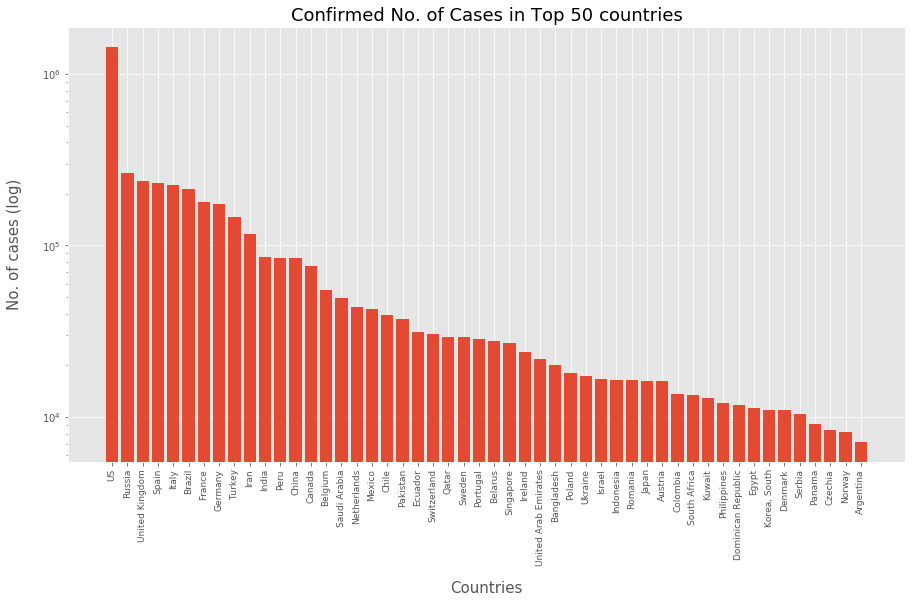

In [14]:
##Sorting the dataframe by confirmed cases
country_df1.sort_values(by=['Confirmed'], inplace=True, ascending=False)

##Selecting the top 50 countries with the highest confirmed cases
top50_confirmed = country_df1.head(50)

category_keys = list(top50_confirmed.Country.values)
category_values = top50_confirmed['Confirmed']

##Bar plot of confirmed cases
plt.figure(figsize=(15,8))
plt.bar(range(len(category_keys)), list(category_values), align='center', log=True)
plt.xticks(range(len(category_keys)), list(category_keys), rotation='vertical', fontsize = 9)

plt.title('Confirmed No. of Cases in Top 50 countries', fontsize=18)
plt.xlabel('Countries', fontsize=15, labelpad=15)
plt.ylabel('No. of cases (log)', fontsize=15, labelpad=20)

plt.show()

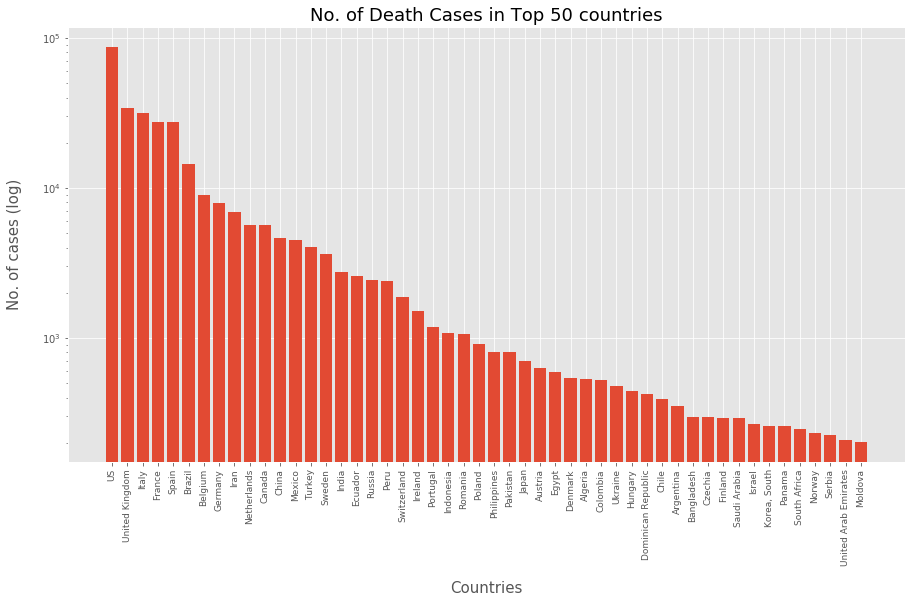

In [15]:
##Sorting the dataframe by death cases
country_df1.sort_values(by=['Deaths'], inplace=True, ascending=False)

##Selecting the top 50 countries with the highest death cases
top50_deaths = country_df1.head(50)

category_keys = list(top50_deaths.Country.values)
category_values = top50_deaths['Deaths']

##Bar plot of confirmed cases
plt.figure(figsize=(15,8))
plt.bar(range(len(category_keys)), list(category_values), align='center', log=True)
plt.xticks(range(len(category_keys)), list(category_keys), rotation='vertical', fontsize = 9)

plt.title('No. of Death Cases in Top 50 countries', fontsize=18)
plt.xlabel('Countries', fontsize=15, labelpad=15)
plt.ylabel('No. of cases (log)', fontsize=15, labelpad=20)

plt.show()

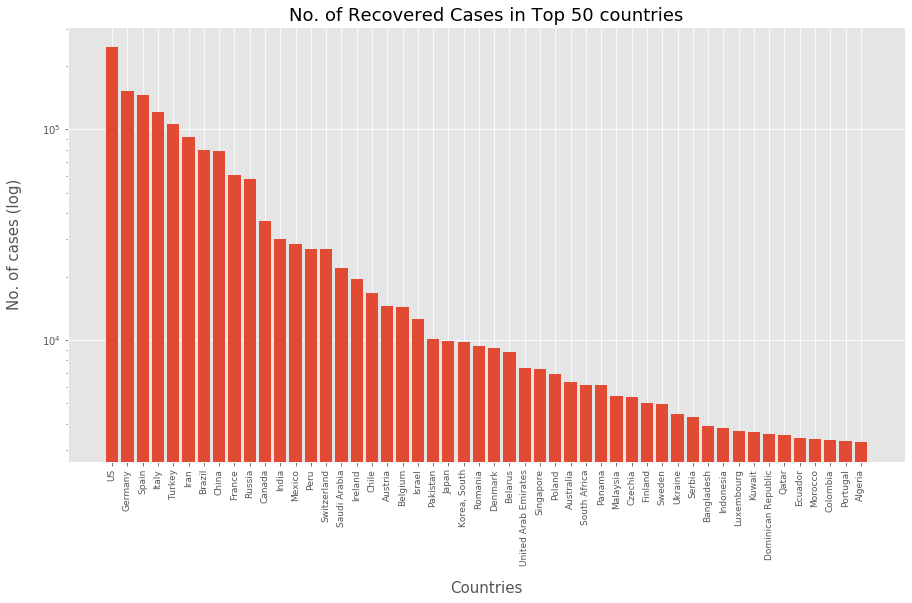

In [16]:
##Sorting the dataframe by recovered cases
country_df1.sort_values(by=['Recovered'], inplace=True, ascending=False)

##Selecting the top 50 countries with the highest death cases
top50_recovered = country_df1.head(50)

category_keys = list(top50_recovered.Country.values)
category_values = top50_recovered['Recovered']

##Bar plot of confirmed cases
plt.figure(figsize=(15,8))
plt.bar(range(len(category_keys)), list(category_values), align='center', log=True)
plt.xticks(range(len(category_keys)), list(category_keys), rotation='vertical', fontsize = 9)

plt.title('No. of Recovered Cases in Top 50 countries', fontsize=18)
plt.xlabel('Countries', fontsize=15, labelpad=15)
plt.ylabel('No. of cases (log)', fontsize=15, labelpad=20)

plt.show()

**Analysis**

>Based on the graph above, US currently has significantly more confirmed cases than any other country. UK, Spain and Italy are almost on par with Russia, behind the US. On the other hand, the most number of deaths is in the US as well and considering how the US has the most number of cases currently, we expect this number to rise and for this reason, US will continue to sit at the front in the near future. Owing to their considerable number of cases, US currently leads in the number of recovered cases. 
>
>Despite the origin of COVID-19 in China, we have seen from just the bar plots above that the number of cases has transited and in fact, shifted on to the West. One might not have expected that when the hotspots were saturated in China, Iran, Italy and South Korea in late February, US will have far superior number of cases today. China has since moved out of Top 10, behind Iran and China is taking steps to reopen its border once again. 
>
>What we are curious about at this point though, is how many cases does each country have exactly and how many of them are active? This is because we are aware that China is among the top few countries in these charts but the number of active cases in China at the moment is among the lowest in the world.

### 2.2.3 Visualizing COVID-19 by the number of cases with Plotly

In the previous section, we took on an overview on the number of cases across the top 50 countries. However, we will now place more emphasis on the number of active cases which hold key importance in understanding sentiments around the world as well. Previously, we mentioned that despite knowing that COVID-19 originated from China and they have been an epicenter for the longest period of time, we will be curious to see how China stands in the active cases parameter. 

We will be using interactive Plotly which allow users to explore the visualization through a range of functionalities such as zoom, hover and export.

In [17]:
##Top 20 confirmed cases and death cases
confirmed_fig = px.bar(country_df1.sort_values('Confirmed').tail(20), x="Confirmed", y="Country", 
               text='Confirmed', orientation='h', color_discrete_sequence = ['#fe9801'])
death_fig = px.bar(country_df1.sort_values('Deaths').tail(20), x="Deaths", y="Country", 
               text='Deaths', orientation='h', color_discrete_sequence = ['#ff2e2e'])

##Top 20 recovered cases and active cases
recovered_fig = px.bar(country_df1.sort_values('Recovered').tail(20), x="Recovered", y="Country", 
               text='Recovered', orientation='h', color_discrete_sequence = ['#21bf73'])
active_fig = px.bar(country_df1.sort_values('Active').tail(20), x="Active", y="Country", 
               text='Active', orientation='h', color_discrete_sequence = ['#ffff2e'])

##Plot
fig = make_subplots(rows=2, cols=2, shared_xaxes=False, horizontal_spacing=0.14, vertical_spacing=0.08,
                    subplot_titles=('Confirmed cases', 'Deaths reported', 'Recovered cases', 'Active cases'))
                    
fig.add_trace(confirmed_fig['data'][0], row=1, col=1)
fig.add_trace(death_fig['data'][0], row=1, col=2)
fig.add_trace(recovered_fig['data'][0], row=2, col=1)
fig.add_trace(active_fig['data'][0], row=2, col=2)
                    
fig.update_layout(height=1200)

**Analysis**

>The graph of active cases projects a worry. The US is dealing with more than 1 million cases concurrently, far more than any other country. On the other hand, we have seen that despite its standing at the Top 10 in confirmed, death and recovered cases, China has fallen out of the number of active cases. The number of active cases may play a crucial role in understanding sentiments at a given point of time as it reflects the current situation of a particular country. For the case of the specified countries for our sentiment analysis, United Kingdom, France, Italy and Spain are among the hotspots in the number of active cases, while Germany stands in the second highest number of recovered cases, ahead of Switzerland in 14th.  

### 2.2.4 Visualizing the number of cases through Maps

In [18]:
##Depicting No. of Confirmed Cases, tooltips on all statistics
m = folium.Map(location=[0, 0], tiles='CartoDB Positron',
               min_zoom=1, max_zoom=6, zoom_start=2)

for i in range(0, len(geo_df)):
    folium.Circle(
        location=[geo_df.iloc[i]['Lat'], geo_df.iloc[i]['Long']],
        color='crimson', fill='crimson',
        tooltip =   '<li><bold>Country : '+str(geo_df.iloc[i]['Country'])+
                    '<li><bold>Confirmed : '+str(geo_df.iloc[i]['Confirmed'])+
                    '<li><bold>Active : '+str(geo_df.iloc[i]['Active'])+
                    '<li><bold>Deaths : '+str(geo_df.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(geo_df.iloc[i]['Recovered']),
        radius=int(geo_df.iloc[i]['Confirmed'])**1.1).add_to(m)
m

**Analysis**

> The purpose of creating a geomap visualization is to allow us contextualize the number of cases on a geographical space. From our previous analysis, we have seen the disparity in the number of cases especially in the US, among some of the other hotspots such as United Kingdom, Spain and France. Knowing that the hotspots were once saturated in China, South Korea, Iran and Italy, the folium map visualization showed us a distinct shift in the number of cases to the West. In fact, we are also able to see a downward trend in the case that the South America countries are seeing a rapid rise in the number of cases. As we hover over the South America continent, we know that Brazil and Peru have one of the highest number of cases in the region. 

### 2.2.5 Flourish Visualization of Confirmed Cases Span by Country

In our final visualization on the global scale of EDA, we adopted Flourish visualization on the span of the number of confirmed cases by country. This will give us a clear overview of how the COVID-19 pandemic has shifted across different countries and regions, and how this may have influence the sentiments in different point of time since early February. 

**Note:** If you are unable to view the Flourish visualization on HTML, please [click here](https://public.flourish.studio/visualisation/2217858/). 

_Last updated on 15th May 2020_

In [19]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2217858" data-url="https://flo.uri.sh/visualisation/2217858/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

### 2.2.6 Case Study of Denmark

For the final part of EDA, we will scope in to a specific country, Denmark, to understand about its general trend across the number of cases. Denmark has reported its first case on 27 February 2020 and since then, there have been 10,791 confirmed cases as of 15 May 2020. Denmark is one of the first country in the European continent to introduce lockdown measures on 13 March 2020, and the country has since seen that the number of active cases slowed down. 

In [20]:
##Define parameters of Plotly
confirmed_fig = px.bar(denmark_confirmed_df, x=denmark_confirmed_df.index, y="Denmark", color_discrete_sequence = ['#fe9801'])
death_fig = px.bar(denmark_death_df, x=denmark_death_df.index, y="Denmark", color_discrete_sequence = ['#ff2e2e'])

##Plot
fig = make_subplots(rows=1, cols=2, shared_xaxes=False, horizontal_spacing=0.1,
                    subplot_titles=('Confirmed cases', 'Deaths reported'))

fig.add_trace(confirmed_fig['data'][0], row=1, col=1)
fig.add_trace(death_fig['data'][0], row=1, col=2)

fig.update_layout(height=480)
fig.show()

The curves illustrate the bleak state of affairs in Denmark with no apparent sign of slowing. The current state seems better than that in the early stages however. The lockdown seems to have been effective generally. 

We will now approach the central idea of our project on the Sentiment Analysis of COVID-19 in the next section. 

## 3. Sentiment Analysis

In this section, all the Corona related tweets retrieved will be analyzed thoroughly in order to gain a deeper understanding of the public’s view and sentiments towards the development of the pandemic since its major outbreak in the severely affected  European countries such as Denmark, France, Germany, Italy, Spain, Switzerland and United Kingdom. The tweets are narrowed down to Corona related by filtering based on the Corona related hashtags.
The sentiment analysis process consists of three phases as follows. 

- Retrieving Tweets using Tweepy library
- Data Cleaning
- Performing Sentiment Analysis on the cleaned tweets


### 3.1 Loading Pre-Processed Tweets

In [21]:
##Reading the pre-processed tweet dataset
tweetDataset = load_csv_data(tweetDatasetFileLocation)

##Drop all other columns than 'tweet_id', 'country', 'date', 'time', 'retweet_count', 'tweet_text', 'sentiment_score, 'lang' and 'sentiment_label'
tweetDataset_df = tweetDataset.drop(['user_id','state','city','keywords','user_id','Negative','Neutral','Positive'], axis=1)

In [22]:
##pickle = tweetDataset_df.to_pickle

### 3.1.1 Statistics of the Tweets

In [23]:
##Getting the number of rows from the tweetDataset_df
totalNumOfTweets = tweetDataset_df.shape[0]

print("There are {} tweets in total made by people from the selected countries".format(totalNumOfTweets))

There are 1691058 tweets in total made by people from the selected countries


**Getting the tweet count by country**

In [24]:
tweetSummary_df = tweetDataset_df.groupby(["country"]).count().reset_index()
tweetSummary_df = tweetSummary_df.drop(['date','time','retweet_count','tweet_text','sentiment_score','lang','Sentiment_label'], axis=1)
tweetSummary_df.columns = ['Country','Num_of_tweets']
tweetSummary_df

Country  Num_of_tweets
0         Denmark          12938
1          France         125975
2         Germany          79460
3           Italy          43963
4           Spain          50499
5     Switzerland          33678
6  United Kingdom        1344545

As it can be seen above, there are certain countries such as the United Kingdom, France and Germany seems to be tweeting more frequently about the coronavirus compared to other countries.

### 3.2 Data Cleaning

**Tweet example :** RT @___pasdesoucis: me running through the church after Corona leave 😂😂😂 https://t.co/3BiO1OmwKo',
  None

This is how a typical tweet would look in the format shown above consisting of unnecessary information such as hashtag symbol, URL etc. Moreover, the tweet would also contain stop words. As these does not add any value to the sentiment analysis, these unnecessary information needs to be removed from the tweets before processing them. 

**Defining a function to clean the tweets**

In [25]:
##Initializing a list unicodes that could be used to determine the pattern and  remove them from the tweets
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)

In [26]:
# Function to clean & tokenize the words within a tweet
def clean_tweet(tweet):

    clean_tweet = re.sub(r'@\w+', '', tweet) # Remove mentions
    clean_tweet = re.sub(r'#\w+', '', clean_tweet) # Remove hashtags
    clean_tweet = re.sub(r'http[s]?:\/\/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
                         '', clean_tweet) # Remove URL's
    clean_tweet = re.sub(r'\d+(.\d+)?', '', clean_tweet) # Remove numbers
    clean_tweet = clean_tweet.encode('ascii', 'ignore').decode('ascii') # Remove ascii characters
    clean_tweet = clean_tweet.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation symbols
    clean_tweet = re.sub(r'…', '', clean_tweet) # Remove consecutive dots (special character)
    clean_tweet = re.sub(r'[\“\”\’]', '', clean_tweet) # Remove special quotes and double quotes
    clean_tweet = re.sub(r' +', ' ', clean_tweet) # Remove unnecesary whitespaces
    clean_tweet = emoji_pattern.sub(r'', clean_tweet) # no emoji
    clean_tweet = ' '.join( [w for w in clean_tweet.split() if len(w)>1] ) # Remove isolated letters
    tweet_tokens = word_tokenize(clean_tweet.lower())
    filtered_tokens = []
    for w in tweet_tokens: 
        if w not in stop_words: # Filter stop words
            filtered_tokens.append(w) 
    clean_tweet = ' '.join( [w for w in filtered_tokens] )
    
    return clean_tweet

**Cleaning the tweets**

In [27]:
##Converting the tweet_text column to string type to ensure its in the expected format. 
tweetDataset_df['tweet_text'] = tweetDataset_df.tweet_text.astype(str)

##Applying the clean function on every row of the dataframe to clean the tweets.
tweetDataset_df['tweet_text'] = tweetDataset_df.tweet_text.apply(lambda x: clean_tweet(x))

**Extracting the tweets from the tweetDataset_df dataset**

In [28]:
##Extracting the tweets from the tweetDataset_df dataset
eu_tweets = tweetDataset_df.tweet_text

##Converting the eu_tweets series to a list for the ease of use
eu_tweets_list = eu_tweets.values.tolist()

### 3.3 Sentiment Computation

In this section, sentiment would be computed for all the tweets individually.

**Loading the LabMt dataset which contains sentiment score for a variety of english words**

In [29]:
filePath = 'LabMT_wordlist.txt'

labmt = pd.read_csv(filePath, sep='\t')

**Creating a dictionary to store the words from the labMT for a easy look-up**

In [30]:
word_happiness={}
for word in labmt['word']:
    word_idx = labmt[labmt['word']==word].index[0]
    word_happiness[word] = labmt.loc[word_idx,'happiness_average']

**Defining a function to compute sentiment score based on LabMt dataset**

In [31]:
def calc_sentiment(tokens,word_happiness):
    
    happiness_avg = [word_happiness[t.lower()] for t in tokens if t.lower() in word_happiness.keys()]
    
    # tweets which do not contain any words in the happiness list return return 0
    if len(happiness_avg)>0:
        return sum(happiness_avg)/len(happiness_avg)
    else:
        return 0

    return happiness_avg.mean()

**Computing sentiment for all the tweets individually**

In [32]:
## Initializing the variable to store sentiments of tweets
tweet_sentiments = []

#cnt = 0
tweet_sentiments = np.zeros(len(eu_tweets_list))
for i in range(len(eu_tweets_list)):
    #if cnt%1000==0:
        #print(cnt)
    token = eu_tweets_list[i]
    tweet_tokens = nltk.word_tokenize(token.lower())
    tweet_sentiments[i] = calc_sentiment(tweet_tokens,word_happiness)
    #cnt += 1

**Filtering out the sentiments whose happiness score is 0 or less than zero**

In [33]:
filtered_idx = np.argwhere(tweet_sentiments > 0)
filtered_sent = tweet_sentiments[filtered_idx]
filtered_tweets = []

for idx in filtered_idx:
    
    filtered_tweets.append(eu_tweets_list[int(idx)])

**Compute the average $m$ and standard deviation $\sigma$ of the Tweets sentiment**

In [34]:
#overall_sent = np.concatenate((filtered_tweets,filtered_tweets))
overall_sent = filtered_sent
overall_sent_mean = np.mean(overall_sent)
overall_sent_std = np.std(overall_sent)

print('The mean of all the sentiments of the tweets made by both parties is {}'.format(overall_sent_mean))
print('The standard deviation of all the sentiments of the tweets made by both parties is {}'.format(overall_sent_std))

The mean of all the sentiments of the tweets made by both parties is 5.055232999567339
The standard deviation of all the sentiments of the tweets made by both parties is 0.677351987688616


**Extracting the negative tweets by filtering out all the tweets with sentiment ratings over $m$ - 2 *  $\sigma$**

In [35]:
## Filtering out all the tweets with sentiment ratings over m - 2 std
neg_idx = np.argwhere(filtered_sent < (overall_sent_mean-(2*overall_sent_std)))[:,0]
neg_tweets = []
neg_tweets_new = []

#for idx in range(int(neg_idx)):
for idx in neg_idx:
    
    neg_tweets.append(filtered_tweets[int(idx)])

**Extracting the positive tweets by filtering out all the tweets with sentiment ratings over $m$ + 2 *  $\sigma$**

In [36]:
## Filtering out all the tweets with sentiment ratings over m - 2 std
pos_idx = np.argwhere(filtered_sent > (overall_sent_mean + (2*overall_sent_std)))[:,0]
pos_tweets = []
for idx in pos_idx:
   
    pos_tweets.append(filtered_tweets[int(idx)])

**Extracting all the negative tokens from the negative tweets**

In [37]:
neg_tokens = []
for tw in neg_tweets:
    
    tokens = nltk.word_tokenize(tw)
    
    neg_tokens += tokens

**Extracting all the positive tokens from the positive tweets**

In [38]:
pos_tokens = []
for tw in pos_tweets:
    
    tokens = nltk.word_tokenize(tw)
    
    pos_tokens += tokens

### 3.4 Creating Word Cloud with the Extracted Positive and Negative Tokens

In this section, the frequently used positive and negative words in the tweets made by the people in the selected countries will be visualized using word cloud.

**Defining the function to compute tf-idf (method to compute word frequency)**

In [39]:
def calc_tf_idf(tokens,doc_token_sets):
    # calculate tf-idf
    fdist = nltk.FreqDist(tokens)
    ndocs = len(doc_token_sets)
    
    print('doc_token_sets len: ' + str(len(doc_token_sets)))
    tf_idf_list = []
    for item in fdist.most_common():
        word = item[0]
        cnt = 0
        for i in range(ndocs):
            if word in doc_token_sets[i]:
                cnt += 1
        
        try:
            
            idf = math.log(ndocs/cnt)
            tf = item[1]

            tf_idf = tf*idf
            tf_idf_list.append((word,tf_idf))
        except:
            
            print('Exception')
            #pass
            
            
    tf_idf_list = sorted(tf_idf_list, key=lambda x: x[1],reverse = True)  
    
    return tf_idf_list

### 3.4.1 Generating Positive Word Cloud

**Computing the word frequency in the list of positive tokens**

In [40]:
##Extracting the unique positive tokens
doc_tokens = list(set(pos_tokens))

##Computing the word frequency for the list of positive tokens
tf_idf_pos = calc_tf_idf(pos_tokens,doc_tokens)

doc_token_sets len: 15155


In [41]:
##Extracting the top 200 frequently used word for the ease of visualization
tf_idf_pos_lim = tf_idf_pos[:200]

In [42]:
pos_str = ''
for item in tf_idf_pos_lim:
    word = item[0]
    count = int(item[1])
    pos_str += (word + ' ') * count

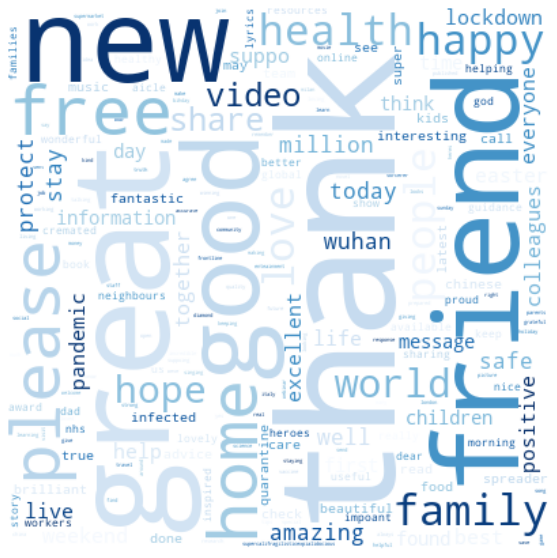

In [43]:
wc_pos = WordCloud(background_color="white",width=400, height=400,colormap=plt.cm.Blues,collocations=False)
wc_pos.generate(pos_str)
plt.figure(figsize=(10,10))
plt.imshow(wc_pos,interpolation='bilinear')
plt.axis("off")
plt.show()

**Analysis**

> When visualizing the positive word cloud, it can be seen that people are frequently using words such as hope, thank and happy. The usage of such words shows that certain people are staying quite positive and being grateful for being safe from the virus. The words such as family and love are also being used quite frequently. It has probably gained some focus as the people have got the opportunity to spend more time with their family away from their busy routine due to quarantine.

### 3.4.2 Generating Negative Word Cloud

**Computing the word frequency in the list of negative tokens**

In [44]:
##Extracting the unique negative tokens
doc_tokens = list(set(neg_tokens))

##Computing the word frequency for the list of negative tokens
tf_idf_neg = calc_tf_idf(neg_tokens,doc_tokens)

doc_token_sets len: 18028


In [45]:
##Extracting the top 200 frequently used word for the ease of visualization
tf_idf_neg_lim = tf_idf_neg[:200]

In [46]:
neg_str = ''
for item in tf_idf_neg_lim:
    word = item[0]
    count = int(item[1])
    neg_str += (word + ' ') * count

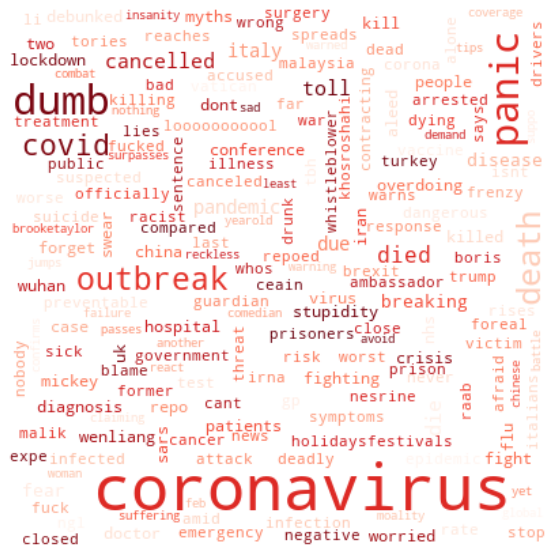

In [47]:
wc_neg = WordCloud(background_color="white",width=400, height=400,colormap=plt.cm.Reds,collocations=False)
wc_neg.generate(neg_str)
plt.figure(figsize=(10,10))
plt.imshow(wc_neg,interpolation='bilinear')
plt.axis("off")
plt.show()

**Analysis**

> When visualizing the negative word cloud, it can be seen that people frequently uses words such as outbreak, coronavirus, panic, death, afraid, risk etc. The usage of these words are expected due to the tension resulted from the pandemic. 

### 3.4 Most Common Positive and Negative Words

The positive and negative word frequency plot gives a broader picture of its usage. And it also helps in quantifying the usage of positive and negative words.

In [48]:
##Selecting the top 20 common positive words
common_pos_words = Counter(pos_tokens).most_common(20)

##Selecting the top 20 common negative words
common_neg_words = Counter(neg_tokens).most_common(20)

##Converting to dataframe for the ease of process
df_pos = pd.DataFrame(common_pos_words) 

##Converting to dataframe for the ease of process
df_neg = pd.DataFrame(common_neg_words)

##Changing the column names
df_pos.columns = ['Word','Freq']

##Changing the column names
df_neg.columns = ['Word','Freq']

##Sorting the dataframe in ascending order
df_pos = df_pos.sort_values('Freq').reset_index().drop(['index'], axis=1)

##Sorting the dataframe in ascending order
df_neg = df_neg.sort_values('Freq').reset_index().drop(['index'], axis=1)

**Inspecting the top positive words**

In [49]:
df_pos.head()

Word  Freq
0     hope   615
1     safe   633
2    video   650
3    happy   669
4  friends   669

**Inspecting the top negative words**

In [50]:
df_neg.head()

Word  Freq
0      people  1050
1  conference  1113
2      crisis  1310
3       italy  1608
4         flu  1615

### 3.4.1 Most Common Positive Words

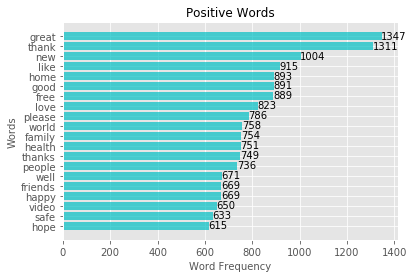

In [51]:
words = list(df_pos['Word'])
y_pos = np.arange(len(words))
freq = list(df_pos['Freq'])

plt.barh(y_pos, freq, align='center', alpha=0.7, color = '#00bfc4' )
plt.style.use('ggplot')
plt.yticks(y_pos, words)
plt.xlabel('Word Frequency', size = 10)
plt.ylabel('Words', size = 10)
plt.title('Positive Words', size = 12)

for i, v in enumerate(freq):
    plt.text(v - 2, i - 0.25 , str(v), color='Black')


plt.show()

### 3.4.2 Most Common Negative Words

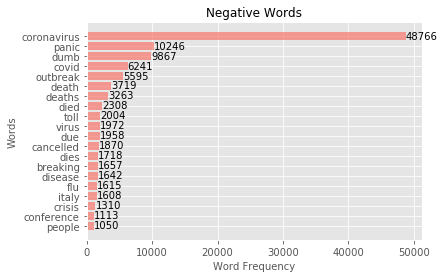

In [52]:
words = list(df_neg['Word'])
y_pos = np.arange(len(words))
freq = list(df_neg['Freq'])

plt.barh(y_pos, freq, align='center', alpha=0.7, color = '#f8766d' )
plt.style.use('ggplot')
plt.yticks(y_pos, words)
plt.xlabel('Word Frequency', size = 10)
plt.ylabel('Words', size = 10)
plt.title('Negative Words', size = 12)

for i, v in enumerate(freq):
    plt.text(v - 2, i - 0.25 , str(v), color='Black', )


plt.show()

**Analysis**

> The frequency of the common positive words seem to be more evenly distributed as compared to the common negative words, in comparison to the majority of the negative tweets which seem to contain the word coronavirus. The more evenly distributed common positive words seem to indicate that people in general are being more positive than negative, which further confirms the observation made with the timeline bar plot.

### 3.5 Sentiment Word Frequency

The sentiment word frequency plot shows how frequently the words with the highest positive and negative sentiments are used.

In [53]:
##Extracting the top 6 positive words with the highest polarity score
common_pos_sent_words = tf_idf_pos[:6]

##Extracting the top 6 positive words with the lowest polarity score
common_neg_sent_words = tf_idf_neg[:6]

In [54]:
##Converting the top 6 positive words with the highest polarity to dataframe
df_common_pos_sent = pd.DataFrame(common_pos_sent_words)

##Converting the top 6 negative words with the lowest polarity to dataframe
df_common_neg_sent = pd.DataFrame(common_neg_sent_words)

##Changing the column names
df_common_pos_sent.columns = ['Word', 'Freq']
df_common_neg_sent.columns = ['Word', 'Freq']

##Creating a new column called Sentiment_label and setting a default value of Positive for the positive words
df_common_pos_sent['Sentiment_label'] = 'Positive'

##Creating a new column called Sentiment_label and setting a default value of negative for the negative words
df_common_neg_sent['Sentiment_label'] = 'Negative'

##Combing the dataframes
frames = [df_common_pos_sent,df_common_neg_sent]

df_sentiment_freq = pd.concat(frames).reset_index()

df_sentiment_freq = df_sentiment_freq.drop('index', 1)

In [55]:
##Combining the positive and negative tokens in order to check the frequency of the words with highest or lowest 
##polarity score in the second step
full_tokens = pos_tokens + neg_tokens

In [56]:
##Computing the frequency of each of the the words with the highest or lowest polarity score
df_sentiment_freq['word_freq'] = df_sentiment_freq.Word.apply(lambda x: full_tokens.count(x))

In [57]:
##Multiplying the word_freq column by -1 if the Sentiment_label is equal to Negative. 
##So that negative words will be shown below the X axis and positive words above the x axis respectively
df_sentiment_freq.loc[df_sentiment_freq.Sentiment_label == 'Negative', 'word_freq'] *= (-1)

##Dropping the Freq column as it is not necessary for the plotting of sentiment word frequency plot 
df_sentiment_freq = df_sentiment_freq.drop(['Freq'], 1)

In [58]:
df_sentiment_freq.head(20)

Word Sentiment_label  word_freq
0         great        Positive       1383
1         thank        Positive       1311
2        thanks        Positive        749
3          like        Positive       1000
4          good        Positive        900
5           new        Positive       1182
6   coronavirus        Negative     -48798
7          dumb        Negative      -9867
8         panic        Negative     -10246
9      outbreak        Negative      -5603
10        covid        Negative      -6253
11       deaths        Negative      -3263

In [59]:
##Setting the Word column as the index so that the words can be displayed in the X axis. 
df_sentiment_freq = df_sentiment_freq.set_index('Word')

Text(0, 0.5, 'Polarity')

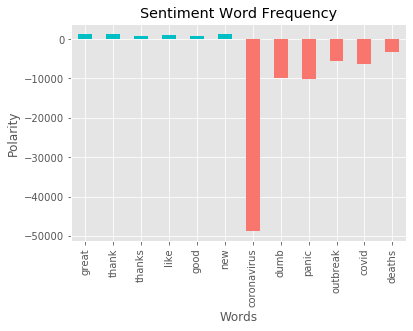

In [60]:
##Plotting the sentiment word frequency plot 
ax = df_sentiment_freq['word_freq'].plot(kind='bar',title = 'Sentiment Word Frequency',sort_columns = 'False',
                             color=df_sentiment_freq.Sentiment_label.map({'Positive': '#00bfc4', 'Negative': '#f8766d'}))

ax.set_xlabel("Words")
ax.set_ylabel("Polarity")

## 4. Genre

We have designed our data story to take on the genres of Partitioned Poster and Animation. The key functionality that we have also incorporated is the layer of interactivity, in the form of hover details-on-demand, filtering and searching. Since we are working with COVID-19 datasets, we thought that the use of Partitioned Poster and Animation genres would allow for an infographic layout to highlight key insights and reasoning in a non-scientific approach with our visualizations. Our target audience are possibly users who are interested to understand the current sentiments of the pandemic, and how it has transverse over time. By structuring the data story, we want to highlight and bring across key pointers and insights to our readers. Subsequently, this will encourage them to reflect and come up with their assumptions on the sentiments in their respective country or even those in our research. Ultimately, we want our readers to also test their assumptions and get themselves involved in the interactive interface of the visualizations to see and realize what are some sentiments which may be far off from what they expect. 

In our data story on Observable, we placed greater emphasis towards the “checklist”, colour, motion and Familiar Object tools. These tools have helped us to orientate our readers to take on a structured approach to facilitate his/her understanding in the topic. Through the use of Familiar Object, we hope to bring the point of relevancy to our users to relate their experiences towards this topic. For the purpose of our narrative structure, we have adopted several building blocks to ensure the optimal takeaway for our users. We utilized linear ordering and several messaging tools (headlines, introductory text and summary), on top of the interactivity layer (hover details, filtering and search). We genuinely hope that users will take away meaningful insights, and possibly reflect on their own sentiments towards the COVID-19 pandemic. 

## 5. Visualizations

All the visualizations that are aimed at showcasing to the end user has been developed in an Observable Notebook. Please access the following link to access the observable notebook.

**Website:** [Corona Virus Visualization](https://observablehq.com/@ashwinth/the-impact-of-corona-virus)

In the span of our project, we have taken cautious approach to ensure that there is a purpose and rationale for designing certain visualizations or data story. Visualizations hold key importance in simplifying abstract or scientific knowledge to the non-scientific masses, and therefore we need to be clear with what we want to portray and the key insights that we want to bring across. In the earlier sections of the report, our exploratory data analysis (EDA) took on a range of visualizations from bar plots to folium geomap and Flourish animated visualization. Since the central idea for our project involves sentiments, we thought that the range of visualizations is important for two reasons – firstly, this would allow us to understand the overview of the pandemic from a different perspective and secondly, this would challenge readers of our explanatory notebook to formulate their own perceptions of the sentiments. 

For the core of our analysis on the website, we adapted the Fluorish animation into our data story to appeal to users and prompt them to create their own perception (See Section 4 Genres). We encouraged users to investigate on the basic statistics of COVID-19 through the D3 interactive interface where they can hover on the bar plots and dropdown selections on focus country. The rationale for creating an interactive interface is to allow users to take on a more inquisitive approach in understanding the current climate of the pandemic. This leads us to the comparative understanding of the number of cases (confirmed, death or recovered) and the number of tweets. We want to direct our users to create their own hypothesis and verify them with our supplemented analysis. By this point of time, users would be curious to see how the sentiments varied across the different countries and what are some key words that were mentioned across Twitter. As such, we utilized the sentiment polarity scoring boxplot and the word cloud to appeal to users with its visuals and colours. Lastly, we ordered the positive and negative words through several bar plots to bring across a formal approach to summarize the key insights to our audience. 


## 6. Discussion

The main scope of this project is to explore the trends and patterns behind the COVID-19 coronavirus outbreak and people’s sentiment towards the pandemic by analyzing tweets that are related to the coronavirus. Using open sources from John Hopkins University Center for Systems Science and Engineering (JHU CSSE), Twitter and with such as text analysis, we were able to extract meaningful information and gain valuable insights on the ongoing pandemic. 

Through our analysis, we identified the developing trends since the global outbreak of the coronavirus. In addition, we used sentiment analysis tools (such as TextBlob and Scikit-Learn) to extract information from the tweets made by people in Europe. By constructing the word clouds, word frequency and sentiment word frequency plots, we managed to gain a deeper understanding of the people’s emotional thoughts during this pandemic situation. 

**Future Improvements**

For future improvements, we hope to expand and enrich the sentiment analysis with more advanced tools such as topic analysis and to implement machine learning model that would be able to compute the sentiments dynamically for any given tweet or text. Moreover, we would want to adopt the use of UX/UI web development to construct a full-fledged data story to appeal to a large group of audience. We do realize the importance of aesthetic and the aspects of Visual Narrative and Narrative Structure as described in Figure 7 of Segal and Heer, in designing an effective, meaningful and impactful data story.  


## 7. Contributions and Acknowledgements

### Contributions

Throughout the entirety of the project, the group has placed strong emphasis on verbal communications with the use of Skype. This has allowed us to remain efficient and true to the implementation plan that we have presented as part of Project A, despite the circumstances in the COVID-19 pandemic. 

| Tasks | Responsible |
| --- | --- |
| Retrieve Tweets | Ashwinth |
| Clean and pre-process retrieved Tweets | Ashwinth |
| Pre-process Covid-19 dataset | Julian |
| Exploratory Data Analysis | Wellace and Julian |
| Sentiment Analysis | Ashwinth |
| Word Cloud | Ashwinth |
| Folium Map Visualization | Wellace |
| Flourish Visualization | Wellace |
| Comparison between number of tweets and confirmed cases | Wellace |
| Sentiment Polarity Plot | Julian |
| Visualization Genre Identification | Wellace |
| Video | Wellace |
| Website | Ashwinth |

### Acknowledgements

We would like to provide our deepest gratitude to Sune Lehmann, Associate Professor for DTU Informatics — Technical University of Denmark (DTU) for his unique teaching methodology in this course that greatly enhanced our interest in this field. 

We would like to thank Alexandra, Germans, Pierre and Joao — Teaching Assistants of the course for their unwavering support in the entirety of the course. 

Thank you, the Center for Systems Science and Engineering (JHU CSSE) for compiling and granting access to the COVID-19 data. And thank you Rabindra Lamsal for providing the API to download the COVID-19 Tweet IDs from the Twitter. 


## 8. Appendix
### Helper Variables and Functions

**Defining global variables**

In [1]:
dateFormat = '%m/%d/%Y'
timeFormat = '%H:%M'

tweetDatasetFileLocation= "Datasets/Cleaned_Final.csv";

selected_countries = ['United Kingdom','Italy','Spain','Germany','France','Denmark','Switzerland']

**Defining global function**

In [2]:
## Defining common functions for manipulating data

#Paramters
#optional
#n_rows: specify number of row to return, if 0, return full dataframe 

def load_data(baseURL, dataFileLocation, n_rows=0):
    df = pd.read_csv(baseURL + dataFileLocation)
    if n_rows > 0:
        df = df.head(n_rows)
    return df

def load_csv_data(dataFileLocation, n_rows=0, sep=','):
    df = pd.read_csv(dataFileLocation)
    if n_rows > 0:
        df = df.head(n_rows)
    return df

**Importing libraries**

In [3]:
# Importing libraries

import pandas as pd
import operator
import numpy as np
from datetime import datetime
import random
import calendar
from IPython.core.display import HTML

# Import ploting packages
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Import sklearn packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# Import geomap packages
import folium
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime

# Import plotly packages
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Import bokeh for part 3
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange, Legend, LegendItem
from bokeh.io import output_notebook

    
import warnings

warnings.filterwarnings('ignore')

import requests
import json

import pprint

import seaborn as sns

import re
import nltk, string
from nltk import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS

from collections import Counter

import os, re, operator, string, math

import matplotlib.pyplot as plt; 
#plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

**Initializing stopwords**

In [4]:
stop_words = set(stopwords.words('english'))
stop_words.add('https')
stop_words.add('http')
stop_words.add('re')